<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/multiple_linier_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple Linear Regression & Polynomial Regression

#Dataset

In [10]:
import pandas as pd

pizza = {'diameter': [6,8,10,14,18],
         'n_toping': [2,1,0,2,0],
         'harga': [7,9,13,17.5,18]}
train_pizza_df = pd.DataFrame(pizza)
train_pizza_df


,diameter,n_toping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


#testing dataset

In [11]:
pizza = {'diameter': [8,9,11,16,12],
         'n_toping': [2,0,2,2,0],
         'harga': [11,8.5,15,18,11]}
test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_toping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


#prosesing data

In [12]:
from re import X
import numpy as np

X_train = np.array(train_pizza_df[['diameter','n_toping']])
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train:\n{y_train}')

X_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train:
[ 7.   9.  13.  17.5 18. ]


In [13]:
X_test = np.array(test_pizza_df[['diameter','n_toping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test:
[11.   8.5 15.  18.  11. ]


#multiple linier regresion

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f'r_square: {r2_score(y_test,y_pred)}')

r_square: 0.7701677731318468


#playnomial regression

>prepoceccing dataset

In [16]:
X_train_poly = np.array(train_pizza_df['diameter']).reshape(-1,1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train_poly:\n{X_train_poly}\n')
print(f'y_train:\n{y_train}')

X_train_poly:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train:
[ 7.   9.  13.  17.5 18. ]


>polynomial regression: Quadratic

In [20]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_reature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_reature.fit_transform(X_train_poly)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



>training model

In [21]:
model = LinearRegression()
model.fit(X_train_quadratic,y_train)

LinearRegression()

>visualisasi data

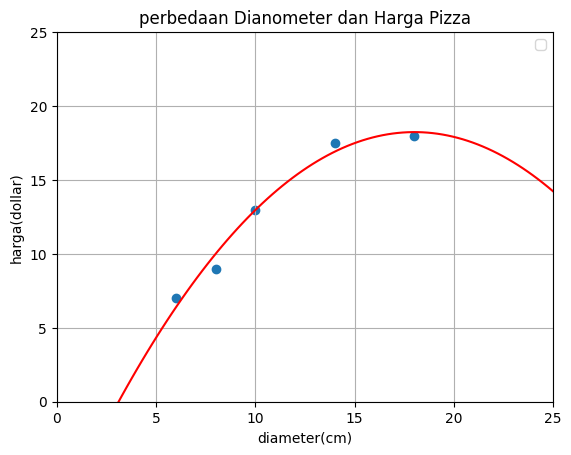

In [29]:
import matplotlib.pyplot as plt

x_vis = np.linspace(0,25,100).reshape(-1,1)
x_vis_quadratic = quadratic_reature.fit_transform(x_vis.reshape(-1,1))
y_vis_pred = model.predict(x_vis_quadratic)

plt.scatter(X_train_poly,y_train,)
plt.plot(x_vis,y_vis_pred, 'r' )

plt.title('perbedaan Dianometer dan Harga Pizza')
plt.xlabel('diameter(cm)')
plt.ylabel('harga(dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.legend()
plt.show()